# Determining the cutout size

* I am using a scaling of R24.  2.5xD24 works well for high surface brightess galaxies, but not for LSB.
* can use D25 instead
  * D24 and D25 will be similar for HSB galaxies
  * D25 will be much greater for LSB galaxies
  
* need to determine the factor beyond R25

In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import os
from matplotlib.patches import Rectangle
import glob
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import sys
homedir = os.getenv("HOME")
sys.path.append(os.path.join(homedir,'github/havirgo/python/'))
sys.path.append(os.path.join(homedir,'github/Virgo/programs/'))
import virgoCommon

Running on Rose's computer


In [2]:
tabledir = os.path.join(homedir,'research/Virgo/tables-north/v2/')
print(tabledir)
plotdir = os.path.join(homedir,'research/Virgo/plots/halpha/')
print(plotdir)

/home/rfinn/research/Virgo/tables-north/v2/
/home/rfinn/research/Virgo/plots/halpha/


In [3]:
%run ~/github/Virgo/programs/readtablesv2.py

# Compare R24 and R25

In [7]:
x = v.ephot['SMA_SB24']
y = v.ephot['SMA_SB25']

sb24 = 2.5*np.log10(v.ephot['FLUX_SB24_R']/x**2)
sb25 = 2.5*np.log10(v.ephot['FLUX_SB24_R']/x**2)

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


Text(0, 0.5, 'SMA_SB25')

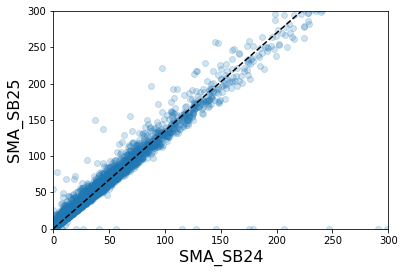

In [31]:
plt.figure()
plt.scatter(x,y,alpha=.2)
xline = np.linspace(0,300,100)
plt.plot(xline,1.35*xline,'k--')
plt.axis([0,300,0,300])
plt.xlabel("SMA_SB24",fontsize=16)
plt.ylabel("SMA_SB25",fontsize=16)

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


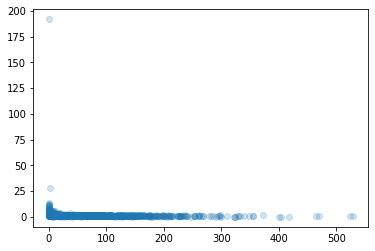

In [12]:
plt.figure()
plt.scatter(x,y/x,alpha=.2)

1.4099121


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


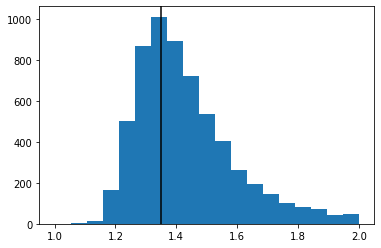

In [24]:
mybins = np.linspace(1,2,20)
plt.hist(y/x,bins=mybins)
plt.axvline(x=1.35,c='k')
print(np.nanmedian(y/x))

So a good scaling for galaxies that don't have R25 is to use

$$\rm  SMA\_SB25 = 1.35 \times SMA\_SB24$$

# Looking into a scale factor that varies with the size of the galaxy

* I used to have a min and max size that I enforced
* let's reconstruct the cutout size first

* code from halphamain.py
```python

        ephot = Table.read(ephot_fname)

        
        #self.radius_arcsec = ephot['SMA_SB24']

        bad_sb25 = ephot['SMA_SB25'] == 0

        self.radius_arcsec = ephot['SMA_SB25']*(~bad_sb25) + 1.35*ephot['SMA_SB24']*bad_sb25
        # OK, I know what you are thinking, I can't possibly be changing this again...

        # use SMA_SB25 instead of SB24 - this should work better for both high and low SB galaxies
        # if SMA_SB25 is not available use 1.35*SMA_SB24

        # for galaxies with SMA_SB24=0, set radius to value in main table 
        noradius_flag = self.radius_arcsec == 0
        self.radius_arcsec[noradius_flag] = self.vf.cat['radius'][noradius_flag]

```

In [4]:
# this is how I create the list of cutout sizes to use with halphagui
%run ~/github/Virgo/programs/readtablesv2.py


In [5]:
# construct radius

bad_sb25 = v.ephot['SMA_SB25'] == 0

radius_arcsec = v.ephot['SMA_SB25']*(~bad_sb25) + 1.35*v.ephot['SMA_SB24']*bad_sb25


# for galaxies with SMA_SB24=0, set radius to value in main table 
noradius_flag = radius_arcsec == 0
radius_arcsec[noradius_flag] = v.main['radius'][noradius_flag]

cutout_scale = 2*1.9

In [55]:
v.main.colnames

['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'radius_flag',
 'objname',
 'PGC',
 'NSAIDV1',
 'NSAIDV0',
 'AGC',
 'NEDname',
 'HLflag',
 'NSAV1flag',
 'NSAV0flag',
 'A100flag',
 'VFID_V1',
 'COflag',
 'HAflag',
 'HAobsflag',
 'Z0MGSflag',
 'Steerflag',
 'unwiseflag',
 'prefix']

xtransition 4.00239127336957


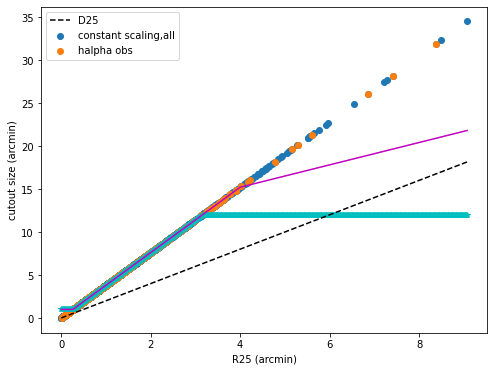

In [52]:
# plot cutout size vs radius

plt.figure(figsize=(8,6))
plt.scatter(radius_arcsec/60,cutout_scale*radius_arcsec/60,label='constant scaling,all')

flag = v.main['HAobsflag']
plt.scatter(radius_arcsec[flag]/60,cutout_scale*radius_arcsec[flag]/60,label='halpha obs')

xline = np.linspace(np.min(radius_arcsec)/60,np.max(radius_arcsec)/60,500)
#yline = 500*np.arctan((xline)/(.5*np.max(xline)))+10
#plt.plot(xline,yline,'k--')

mincut = 1 # arcmin
yline = cutout_scale*xline
flag = yline < mincut
yline[flag] = mincut

maxcut = 12 # arcmin
flag = yline > maxcut
yline[flag] = maxcut
plt.plot(xline,yline,'c*')


plt.xlabel('R25 (arcmin)')

plt.ylabel('cutout size (arcmin)')



mincut = 1 # arcmin
yline = cutout_scale*xline
flag = yline < mincut
yline[flag] = mincut

R25maxcut = 4 # arcmin
flag = xline > R25maxcut
xtransition = xline[flag][0]
print('xtransition',xtransition)
yline[flag] = cutout_scale*xline[flag] - 2.5/60*(xline[flag]*60-xtransition*60)
plt.plot(xline,yline,'m-',mfc='None')


plt.plot(xline,2*xline,'k--',label='D25')
plt.legend()
#plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')

Summary:

* cutouts must be at least 1 arcmin x 1 arcmin

* R25 <= 15 arcsec, then cutout size = 60 arcsec

* 15 arcsec < R25 < 240 arcsec, then 

```
cutout_size = cutout_scale*R25
```

* If R25 > 240 arcsec, then decrease scale factor according to:

```
cutout_size = cutout_scale*R25 - 2.5*(R25-240)
```


In [53]:
2.5/60

0.041666666666666664

In [49]:
1/cutout_scale*60


15.789473684210526

In [61]:
# print out VFIDs of galaxies with size > 10*60/(2.*1.9)
sizecut = maxcut*60/(2.*1.9)
bigflag = (radius_arcsec > sizecut) & (v.main['HAobsflag'])
print(v.main['prefix'][bigflag])

              prefix             
---------------------------------
                 VFID0568-NGC5894
                 VFID1018-NGC3972
              VFID1167-MESSIER109
                 VFID1212-NGC3953
                 VFID1302-NGC4088
             VFID1546-MESSIER051b
             VFID1550-MESSIER051a
                 VFID1754-NGC4051
VFID2070-WISEAJ135318.84+401900.5
                 VFID2074-NGC5353
                              ...
                 VFID5851-NGC5363
                 VFID5880-NGC5921
                 VFID5889-NGC5364
              VFID5960-MESSIER061
                 VFID6033-NGC5566
                 VFID6091-NGC5577
                 VFID6307-NGC5838
                 VFID6340-NGC5746
                 VFID6389-NGC5813
                VFID6425-NGC5846A
                 VFID6437-NGC5850
Length = 32 rows


| Galaxy | Custom Size |

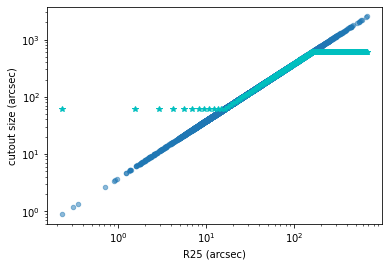

In [53]:
# plot cutout size vs radius

plt.figure()
plt.scatter(radius_arcsec,cutout_scale*radius_arcsec,alpha=.5,s=20)

plt.xlabel('R25 (arcsec)')

plt.ylabel('cutout size (arcsec)')

xline = np.linspace(np.min(radius_arcsec),np.max(radius_arcsec),500)
#yline = 500*np.arctan((xline)/(.5*np.max(xline)))+10
#plt.plot(xline,yline,'k--')

yline = cutout_scale*xline
flag = yline < 60
yline[flag] = 60

maxcut = 10*60
flag = yline > maxcut
yline[flag] = maxcut
plt.plot(xline,yline,'c*')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

### Conclusion

* Decided to not try to implement a sliding scale factor.
* the cutouts are already made - not that big a deal...